# Loading images
Here we are going to resample image to illustrate the anisotropic thickness computation.
Note that the spacing parameter can also be passed to the simple `compute_thickness` function illustrated in the other notebook.

In [1]:
from skimage.io import imread
from matplotlib import pyplot as plt

epi = imread("epi.tif")[:,:,::2].astype(bool)
wall = imread("wall.tif")[:,:,::2].astype(bool)
s = 22

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(epi[s])
axarr[0].set_title("epi")
axarr[0].set_aspect(0.5)
axarr[1].imshow(wall[s])
axarr[1].set_title("wall")
axarr[1].set_aspect(0.5)
plt.show()

<Figure size 640x480 with 2 Axes>

# Solving Laplacian

DEBUG:pyezzi.thickness:Instantiating ThicknessSolver
INFO:pyezzi.thickness:Solving Laplacian...
DEBUG:pyezzi.thickness:Laplacian: 465 iterations, max_error = 9.943685450176897e-07
DEBUG:pyezzi.thickness:Computing tangent vector field
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/opt/ncedilni/miniconda3.6/envs/vtscan/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


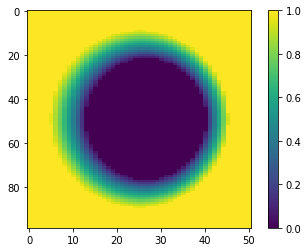

In [2]:
import logging
import numpy as np
from pyezzi import ThicknessSolver

logging.basicConfig(level=logging.DEBUG)

labeled_image = np.zeros_like(epi, np.uint8)
labeled_image[epi] = 1
labeled_image[wall] = 2

f, ax = plt.subplots(1)
solver = ThicknessSolver(labeled_image, spacing=(1,1,2), run=False,
#                          solver="new"
                        )
solver._solve_laplacian()
plt.imshow(solver.cropped_laplace_grid[s])
# cropped because internally, tissue-less borders are removed to reduce mem usage
ax.set_aspect(0.5)
plt.colorbar()
plt.show()

# Computing thickness
Using iterative relaxation

INFO:pyezzi.thickness:Computing L0 and L1...
DEBUG:pyezzi.thickness:Thickness computation: 32 iterations, max_error = 2.0173952123846292e-07
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/opt/ncedilni/miniconda3.6/envs/vtscan/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


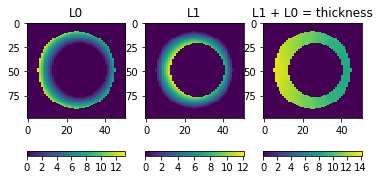

In [3]:
solver._solve_thickness()
fig, axes = plt.subplots(ncols=3)
for img, title, ax in zip((solver.cropped_L0,
                           solver.cropped_L1,
                           solver.cropped_thickness),
                          ('L0', 'L1', 'L1 + L0 = thickness'),
                          axes):
    im = ax.imshow(img[s])
    ax.set_aspect(0.5)
    ax.set_title(title)
    plt.colorbar(mappable=im, ax=ax, orientation='horizontal')

max = 16.00000001363999, moy = 11.120352190947486, min = 8.000180916194477, std = 1.7540840856660627


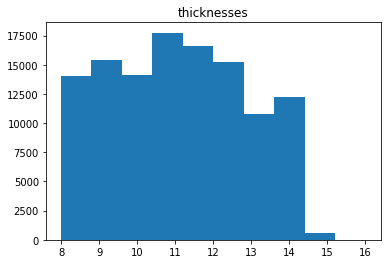

In [4]:
thickness_values = np.nan_to_num(solver.result[wall.astype(bool)])

print("max = {}, moy = {}, min = {}, std = {}".format(thickness_values.max(),
                                                      thickness_values.mean(),
                                                      thickness_values.min(),
                                                      thickness_values.std()))
plt.hist(thickness_values)
plt.title("thicknesses")
plt.show()